In [98]:
import pandas as pd
import utils
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import numpy as np
import scipy.fftpack

sns.set(rc={'figure.figsize':(11,4)})

JAIPUR_DIST_ID = 508

In [46]:
time_df = utils.mergeCsvsInDirectory('data/DailyAverages')
jaipur_df = time_df[time_df['unique_dist_id'] == JAIPUR_DIST_ID]
jaipur_annual_df = jaipur_df.groupby(by=['month', 'day']).mean().drop(columns=['year', 'unique_dist_id']).reset_index()

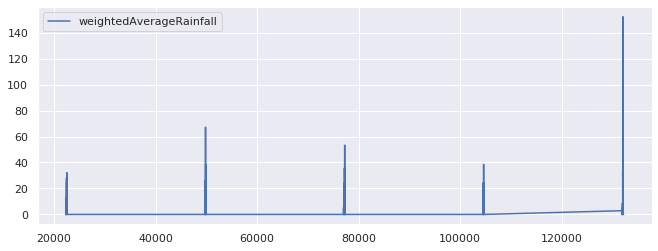

In [96]:
jaipur_df.plot(y='weightedAverageRainfall')

/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/ipykernel/__main__.py:1: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
  if __name__ == '__main__':


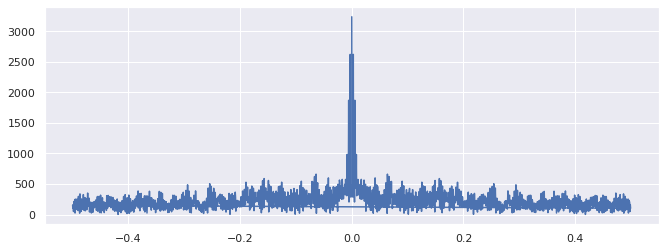

In [117]:
yf = np.abs(scipy.fft(jaipur_df['weightedAverageRainfall'][:-10]))
x = scipy.fftpack.fftfreq(yf.size)

plt.plot(x, yf)

In [228]:
yf[round(len(yf)/2)]

151.2377445135259

In [213]:
con = jaipur_df['weightedAverageRainfall']
inv = scipy.fftpack.ifft(yf)
len(inv)

1816

/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


ValueError: x and y must have same first dimension, but have shapes (1816,) and (1826,)

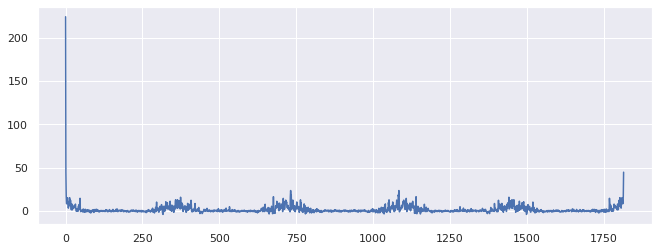

In [226]:
plt.plot(range(len(inv)), inv)
plt.plot(range(len(inv)), jaipur_df['weightedAverageRainfall'])

In [159]:
jaipur_annual_df['date'] = jaipur_annual_df['month'].astype(str) + '-' + jaipur_annual_df['day'] .astype(str) + '-' + '2012'
jaipur_annual_df['date'] = pd.to_datetime(jaipur_annual_df['date'])
jaipur_annual_df = jaipur_annual_df.set_index('date')
jaipur_annual_df

,month,day,Unnamed: 0,rainfall,weightedAverageTemperature,weightedAverageRainfall
date,,,,,,
2012-01-01,1,1,0.0,2.60,13.948485,0.571152
2012-01-02,1,2,1.0,0.00,13.303038,0.000000
2012-01-03,1,3,2.0,1.34,12.604427,0.352387
2012-01-04,1,4,3.0,0.00,12.873683,0.000000
2012-01-05,1,5,4.0,0.00,12.675401,0.000000
...,...,...,...,...,...,...
2012-12-27,12,27,360.2,0.00,14.499179,0.000000
2012-12-28,12,28,361.2,0.00,14.562102,0.000000
2012-12-29,12,29,362.2,0.00,14.441704,0.000000


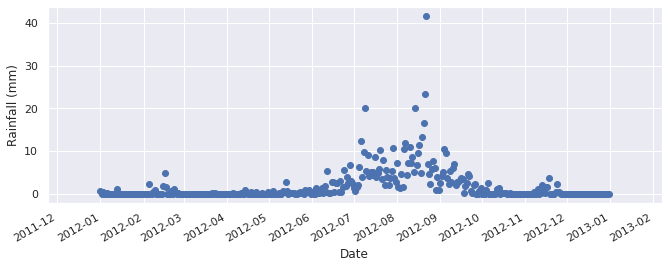

In [87]:
years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month

fig, ax = plt.subplots()

ax.scatter(jaipur_annual_df.index, jaipur_annual_df.loc['2012', "weightedAverageRainfall"])
ax.set_xlabel('Date');
ax.set_ylabel('Rainfall (mm)');

# format the ticks
ax.xaxis.set_major_locator(months)
ax.xaxis.set_minor_locator(months)

# rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them
fig.autofmt_xdate()

The monsoon start/end could be the first set of days when rainfall is consecutively above/below a certain threshold.

In [359]:
rain_minimum = 1
start_days = 30
end_days = 20

endIndices = np.prod(
    [(jaipur_annual_df['weightedAverageRainfall'].shift(i) > rain_minimum) for i in range(1, 1+ end_days)]
, axis=0) & (jaipur_annual_df['weightedAverageRainfall'] < rain_minimum)

ends = list(map(
    lambda x: x.strftime('%Y-%m-%d'),
    jaipur_annual_df[endIndices].index.to_list(),
))

startIndices = np.prod(
    [(jaipur_annual_df['weightedAverageRainfall'].shift(i) < rain_minimum) for i in range(1, 1+start_days)]
, axis=0) & (jaipur_annual_df['weightedAverageRainfall'] > rain_minimum)

starts = list(map(
    lambda x: x.strftime('%Y-%m-%d'),
    jaipur_annual_df[startIndices].index.to_list(),
))

With more time, I would more thoroughly parameterize this to find the best heuristic for start and end dates.

In [360]:
print(f'possible starts: {sum(startIndices)}')
print(f'possible ends: {sum(endIndices)}')

possible starts: 1
possible ends: 1


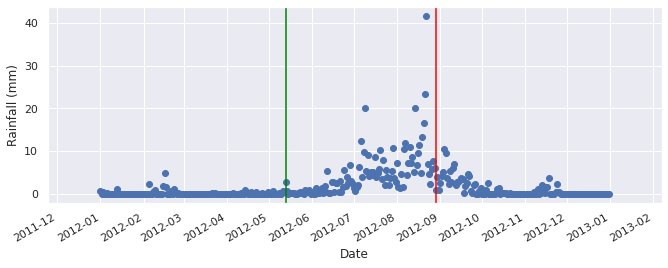

In [361]:
years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month

fig, ax = plt.subplots()

ax.scatter(jaipur_annual_df.index, jaipur_annual_df.loc['2012', "weightedAverageRainfall"])
ax.set_xlabel('Date');
ax.set_ylabel('Rainfall (mm)');

# format the ticks
ax.xaxis.set_major_locator(months)
ax.xaxis.set_minor_locator(months)

# rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them
fig.autofmt_xdate()

for date in ends:
    plt.axvline(x=pd.to_datetime(date), c='red')

for date in starts:
    plt.axvline(x=pd.to_datetime(date), c='green')

With more time, I would use a Fourier transform to determine the periodicity of the monsoon over the years.